In [1]:
import os
from tqdm import tqdm
# Data Processing Libraries 
import pandas as pd 
import numpy as np 
# Feature Engineering Libraries
from sklearn.preprocessing import OneHotEncoder
# Data Visualisation libraries 
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
## Image Augmentation 
# skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import rotate, AffineTransform, warp,rescale, resize, downscale_local_mean
from skimage import color,data
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
#OpenCV-Python
import cv2
# Albumentations
import albumentations as A
SAMPLE_LEN=100

In [2]:
train_image_path = './plant_dataset/train/images'
test_image_path = './plant_dataset/test/images'
train_df_path = './plant_dataset/train/train_label.csv'
test_df_path = './plant_dataset/test/test_label.csv'

In [3]:
df_train = pd.read_csv(train_df_path)
df_train.head()

,images,labels
0,a8ab965f868fc44c.jpg,healthy
1,a5d8924f7fad18a0.jpg,healthy
2,fab3f2b1c0d2a982.jpg,scab
3,d9b283cd98b19d13.jpg,scab
4,852979c129dde25d.jpg,frog_eye_leaf_spot


In [4]:
df_train['labels'].value_counts()

labels
scab                               767
healthy                            753
frog_eye_leaf_spot                 523
rust                               309
complex                            256
powdery_mildew                     182
scab frog_eye_leaf_spot             90
scab frog_eye_leaf_spot complex     40
frog_eye_leaf_spot complex          27
rust frog_eye_leaf_spot             21
rust complex                        17
powdery_mildew complex              15
Name: count, dtype: int64

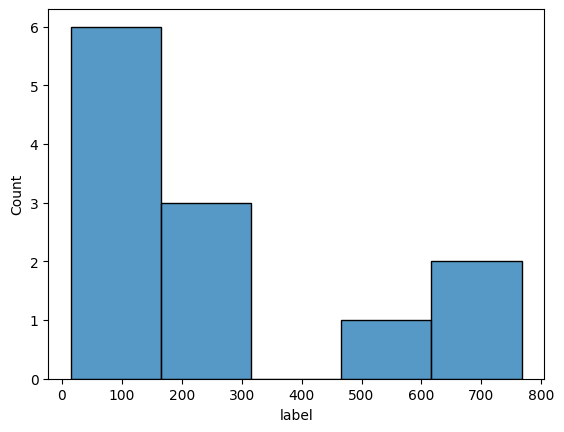

In [5]:
# 创建一个数据框，包含类别和对应的数量
label_counts = df_train['labels'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# 使用histplot绘制直方图
sns.histplot(data=label_counts, x='count', kde=False)

# 设置坐标轴标签
plt.xlabel('label')

plt.show()

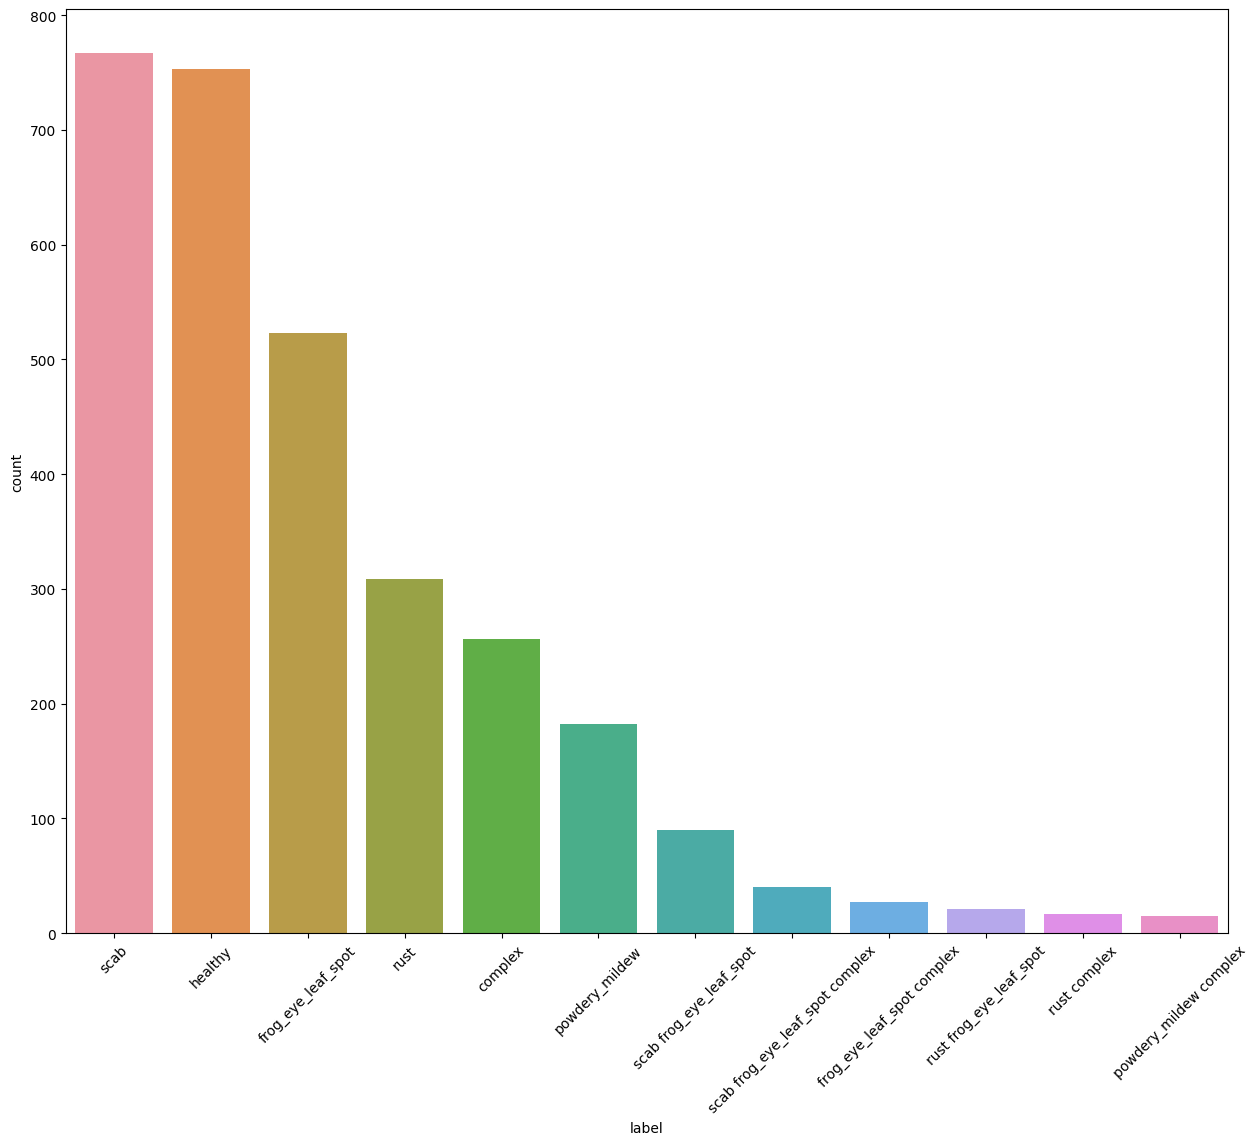

In [6]:
plt.figure(figsize=(15, 12))

# 创建一个数据框，包含类别和对应的数量
label_counts = df_train.labels.value_counts().reset_index()
label_counts.columns = ['label', 'count']

# 使用barplot绘制条状图
labels = sns.barplot(x='label', y='count', data=label_counts)

# 调整x轴标签的旋转角度
for item in labels.get_xticklabels():
    item.set_rotation(45)

plt.show()

In [7]:
source = df_train['labels'].value_counts()
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Label distribution')
fig.show()

In [8]:
def visualize_batch(path,image_ids, labels):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, labels)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(os.path.join(path, image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(f"Class: {label}", fontsize=12)
        plt.axis("off")
    plt.show()

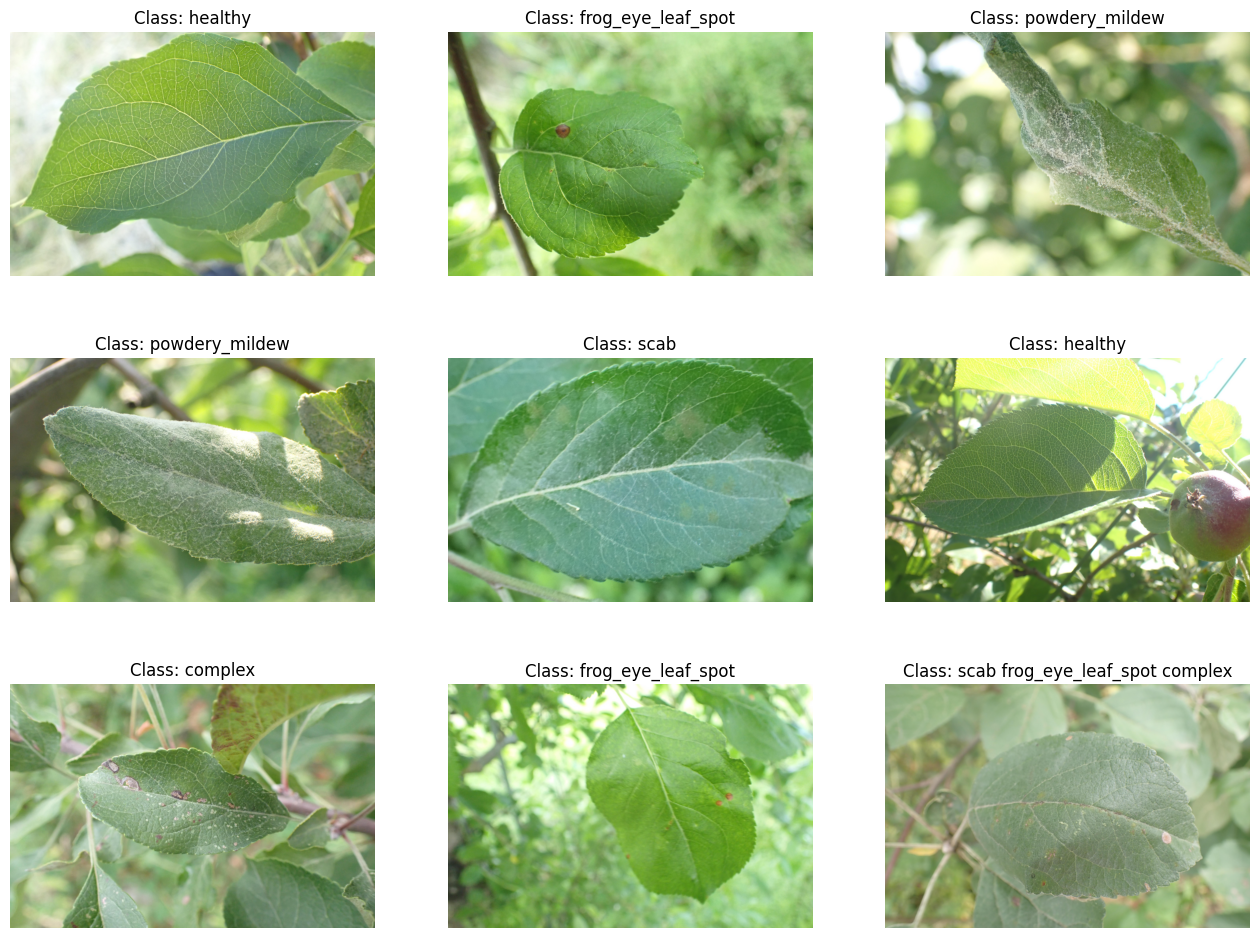

In [9]:
tmp_df = df_train.sample(9)
image_ids = tmp_df["images"].values
labels = tmp_df["labels"].values
visualize_batch(train_image_path,image_ids,labels)

In [10]:
def load_image(image_id):
    file_path = image_id
    image = cv2.imread(train_image_path+'/'+ file_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Just take 100 sample images with SAMPLE_LEN=100 for RBG Channel Analysis

train_images = df_train["images"][:SAMPLE_LEN].apply(load_image)

In [11]:
red_values = [np.mean(train_images[idx][:, :, 0]) for idx in range(len(train_images))]
green_values = [np.mean(train_images[idx][:, :, 1]) for idx in range(len(train_images))]
blue_values = [np.mean(train_images[idx][:, :, 2]) for idx in range(len(train_images))]
values = [np.mean(train_images[idx]) for idx in range(len(train_images))]

In [12]:
fig = ff.create_distplot([values], group_labels=["Channels"], colors=["purple"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

In [13]:
fig = ff.create_distplot([red_values], group_labels=["R"], colors=["red"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of red channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

In [14]:
fig = ff.create_distplot([green_values], group_labels=["G"], colors=["green"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of green channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

In [15]:
fig = ff.create_distplot([blue_values], group_labels=["B"], colors=["blue"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of blue channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

In [16]:
fig = go.Figure()

for idx, values in enumerate([red_values, green_values, blue_values]):
    if idx == 0:
        color = "Red"
    if idx == 1:
        color = "Green"
    if idx == 2:
        color = "Blue"
    fig.add_trace(go.Box(x=[color]*len(values), y=values, name=color, marker=dict(color=color.lower())))
    
fig.update_layout(yaxis_title="Mean value", xaxis_title="Color channel",
                  title="Mean value vs. Color channel", template="plotly_white")

In [17]:
fig = ff.create_distplot([red_values, green_values, blue_values],
                         group_labels=["R", "G", "B"],
                         colors=["red", "green", "blue"])
fig.update_layout(title_text="Distribution of each channel values", template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [18]:
df_train['label_list'] = df_train['labels'].str.split(' ')

In [19]:
lbls = ['healthy','complex','rust','frog_eye_leaf_spot','powdery_mildew','scab']
for x in lbls:
    df_train[x]=0

In [20]:
def lbl_lgc(col,lbl_list):
    if col in lbl_list:
        res = 1 
    else:
        res = 0
    return res

In [21]:
lbls = ['healthy','complex','rust','frog_eye_leaf_spot','powdery_mildew','scab']

for x in lbls:
    df_train[x] = np.vectorize(lbl_lgc)(x,df_train['label_list'])

In [22]:
df_train

,images,labels,label_list,healthy,complex,rust,frog_eye_leaf_spot,powdery_mildew,scab
0,a8ab965f868fc44c.jpg,healthy,[healthy],1,0,0,0,0,0
1,a5d8924f7fad18a0.jpg,healthy,[healthy],1,0,0,0,0,0
2,fab3f2b1c0d2a982.jpg,scab,[scab],0,0,0,0,0,1
3,d9b283cd98b19d13.jpg,scab,[scab],0,0,0,0,0,1
4,852979c129dde25d.jpg,frog_eye_leaf_spot,[frog_eye_leaf_spot],0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2995,eb8100abfd56157c.jpg,healthy,[healthy],1,0,0,0,0,0
2996,a89097fa5afb011b.jpg,healthy,[healthy],1,0,0,0,0,0
2997,f05ad49e5f0a0d4b.jpg,frog_eye_leaf_spot,[frog_eye_leaf_spot],0,0,0,1,0,0
2998,be7ef6d45ac18401.jpg,complex,[complex],0,1,0,0,0,0
